Проверить в данных наличие пропущенных значений. Вывести количество пропущенных значений в процентах. Удалить два признака, в которых больше всех пропущенных значений. Для оставшихся признаков обработать пропуски: для категориального признака использовать заполнение значением по умолчанию (например, «other»), для числового признака использовать заполнение медианным значением. Показать, что пропусков больше в данных нет.
В цикле проверяем количество пропущенных значений и выводим результат в процентах. Основываясь на выводе, удаляем два столбца с 4.7 и 0.4 процентами пропусков. Категориальный и числовой признаки с 0.2% пропусков заполняем «other» и медианным значением соответственно. Проверяем пропуски.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('ECDCCases.csv', sep = ',')
df = pd.DataFrame(data)
for column in df.columns:
    missing = np.mean(df[column].isna()*100)
    print(f"{column} : {round(missing,1)}%")
df.drop(['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', 'geoId'],  axis=1, inplace=True)
df.countryterritoryCode.fillna('other', inplace=True)
df.popData2019.fillna(df.popData2019.median(), inplace=True)
df.isna().sum()

dateRep : 0.0%
day : 0.0%
month : 0.0%
year : 0.0%
cases : 0.0%
deaths : 0.0%
countriesAndTerritories : 0.0%
geoId : 0.4%
countryterritoryCode : 0.2%
popData2019 : 0.2%
continentExp : 0.0%
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 : 4.7%


dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
countryterritoryCode       0
popData2019                0
continentExp               0
dtype: int64

Посмотреть статистику по данным, используя describe(). 
Сделать выводы о том, какие признаки содержат выбросы. 
Посмотреть, для каких стран количество смертей в день превысило 3000 и сколько таких дней было.

In [4]:
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
0,14/12/2020,14,12,2020,746,6,Afghanistan,AFG,38041757.0,Asia
1,13/12/2020,13,12,2020,298,9,Afghanistan,AFG,38041757.0,Asia
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
3,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
4,11/12/2020,11,12,2020,63,10,Afghanistan,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZWE,14645473.0,Africa
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZWE,14645473.0,Africa


In [5]:
print(df.describe())

                day         month          year          cases        deaths  \
count  61904.000000  61904.000000  61904.000000   61904.000000  61904.000000   
mean      15.629232      7.067104   2019.998918    1155.079026     26.053987   
std        8.841624      2.954816      0.032881    6779.010824    131.222948   
min        1.000000      1.000000   2019.000000   -8261.000000  -1918.000000   
25%        8.000000      5.000000   2020.000000       0.000000      0.000000   
50%       15.000000      7.000000   2020.000000      15.000000      0.000000   
75%       23.000000     10.000000   2020.000000     273.000000      4.000000   
max       31.000000     12.000000   2020.000000  234633.000000   4928.000000   

        popData2019  
count  6.190400e+04  
mean   4.091909e+07  
std    1.529798e+08  
min    8.150000e+02  
25%    1.324820e+06  
50%    7.169456e+06  
75%    2.851583e+07  
max    1.433784e+09  


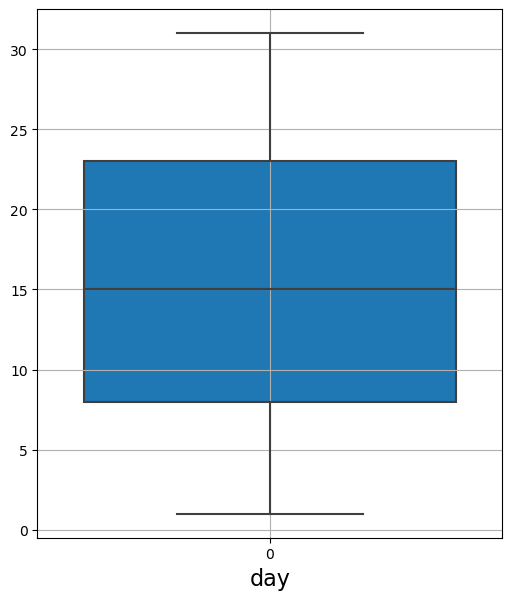

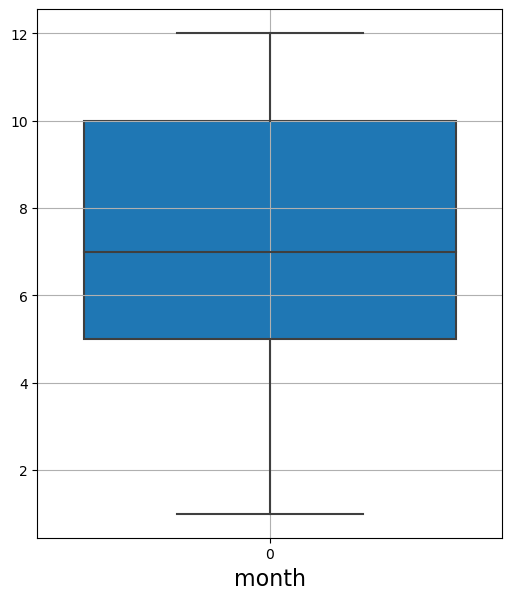

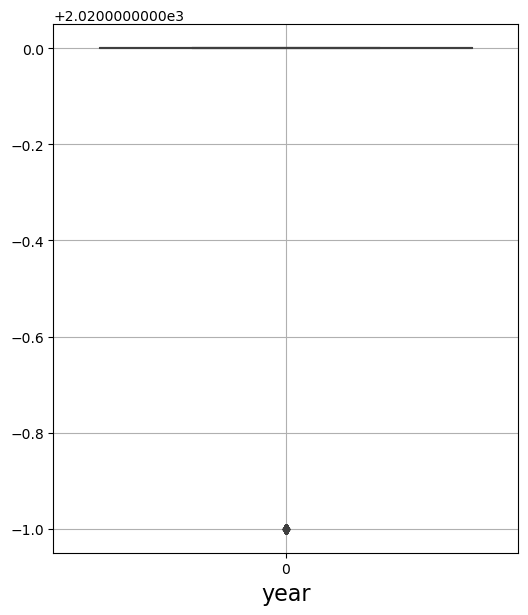

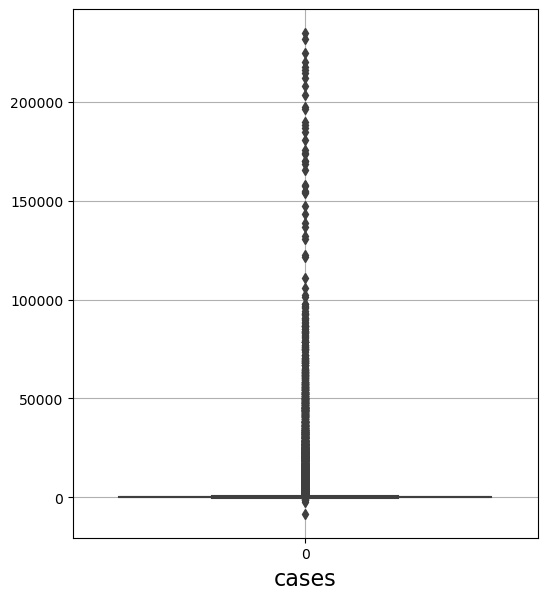

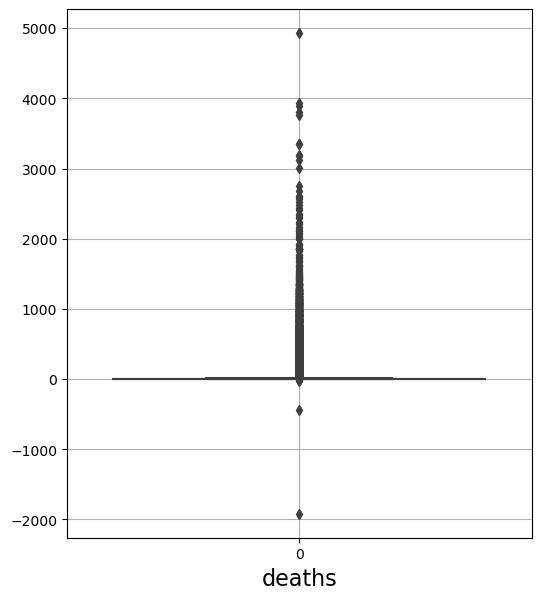

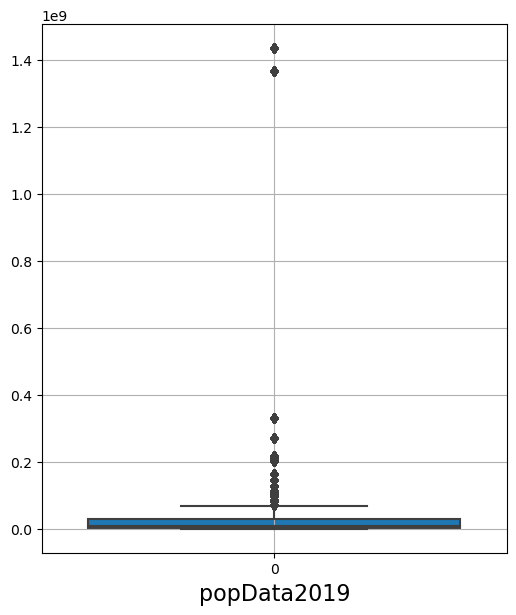

In [7]:
df5 = df.select_dtypes(include=['int64', 'float64'])
for column in df5.columns:
    f= plt.figure(figsize=(6,7), dpi = 100)
    sns.boxplot(data = df5[column], linewidth = 1.5, saturation =1)
    plt.xlabel(column, fontsize = 16)
    plt.grid()
    plt.show()

Day и month, очевидно, выбросов не содержат. Boxplot year показывает, что большинство показаний – из 2020 года, и меньшинство – из 2019.  Графики для cases  и deaths, показывают, что 75% данных не переходят границу Q3, но наибольшие значения лежат выше этой границы. Так же в boxplot deaths есть отрицательные выбросы. Boxplot popData2019 показывает наличие множества выбросов за верхней границей.

In [8]:
df1 = df.loc[(df.deaths > 3000)]

print('Страны с количеством смертей в день больше 3000 : ')
print( df1.countriesAndTerritories.value_counts())
print('Количество дней :', len(df1))


Страны с количеством смертей в день больше 3000 : 
United_States_of_America    6
Peru                        2
Argentina                   1
Ecuador                     1
Mexico                      1
Name: countriesAndTerritories, dtype: int64
Количество дней : 11


Найти дублирование данных. Удалить дубликаты

In [9]:
df.drop_duplicates()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
0,14/12/2020,14,12,2020,746,6,Afghanistan,AFG,38041757.0,Asia
1,13/12/2020,13,12,2020,298,9,Afghanistan,AFG,38041757.0,Asia
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
4,11/12/2020,11,12,2020,63,10,Afghanistan,AFG,38041757.0,Asia
5,10/12/2020,10,12,2020,202,16,Afghanistan,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZWE,14645473.0,Africa
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZWE,14645473.0,Africa


Загрузить данные из файла “ bmi.csv”. Взять оттуда две выборки. 
Одна выборка – это индекс массы тела людей c региона northwest, 
вторая выборка –это индекс массы тела людей с региона southwest. 
Сравнить средние значения этих выборок, используя t-критерий Стьюдента. 
Предварительно проверить выборки на нормальность (критерий Шопиро-Уилка) и на
гомогенность дисперсии (критерий Бартлетта).

In [21]:
import scipy.stats as sts
data2 = pd.read_csv('bmi.csv', sep = ',')
df2=pd.DataFrame(data2)
s_northwest = df2[df2["region"] == 'northwest'].drop('region', axis=1).squeeze()
s_southwest = df2[df2["region"] == 'southwest'].drop('region', axis=1).squeeze()
print('Тест Шапиро-Уилка: ',sts.shapiro(s_northwest), '\n',sts.shapiro(s_southwest) )
print('Тест Бартлетта: ', sts.bartlett(s_northwest, s_southwest))
print('т-критерий Стьюдента: ', sts.ttest_ind(s_northwest, s_southwest))

Тест Шапиро-Уилка:  ShapiroResult(statistic=0.9954643249511719, pvalue=0.46545225381851196) 
 ShapiroResult(statistic=0.994927167892456, pvalue=0.3630009591579437)
Тест Бартлетта:  BartlettResult(statistic=3.4000745256463825, pvalue=0.06519347353580048)
т-критерий Стьюдента:  Ttest_indResult(statistic=-3.2844171500398582, pvalue=0.001076958496307695)


Тест Шапиро-Уилка показывает, что выборки имеют нормальное распределение, а тест Бартлетта с pvalue >0.05 указывает на то, что нет достаточных доказательств того, что эти две группы имеют разные дисперсии. Можем переходить к t критерию Стьюдента. pvalue ниже 0.05, следовательно, нулевая гипотеза о принадлежности групп одной генеральной совокупности отвергается, выборки могут принадлежать к разным генеральным совокупностям, и их средние значения различны.

С помощью критерия Хи-квадрат проверить, является ли полученное распределение равномерным.Кубик бросили 600 раз, получили следующие результаты

In [13]:
data3=pd.DataFrame({'Выпавшие':[97,98,109,95,97,104], 'Ожидаемые': [100]*6})
print('Хи-квадрат, равномерность данных: ', sts.chisquare(data3['Выпавшие'], data3['Ожидаемые']))

Хи-квадрат, равномерность данных:  Power_divergenceResult(statistic=1.44, pvalue=0.9198882077437889)


Нулевая гипотеза о равномерности распеделения не отвергается.

С помощью критерия Хи-квадрат проверить, влияет ли семейное положение на занятость

In [27]:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
                     'Гражданский брак': [80,22,20,35,6,4],
                     'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']
print(sts.chi2_contingency(data))

(122.29654948595365, 1.7291616900960234e-21, 10, array([[74.664, 68.136, 61.2  ],
       [30.378, 27.722, 24.9  ],
       [24.156, 22.044, 19.8  ],
       [30.744, 28.056, 25.2  ],
       [13.176, 12.024, 10.8  ],
       [ 9.882,  9.018,  8.1  ]]))


Pvalue очень низкое, следовательно, можно отклонить нулевую гипотезу о независимости данных, и сделать вывод о том, что семейное положение влияет на занятость.